# 1. Introduction
Entreprise

Academy est une start-up spécialisée dans la formation et de cours en ligne pour un public de niveau lycée et université.dans le cadre de son expansion international, il est important d'établir une strategie d'investissement et d'implementation dans de nouveaux pays.



### Mission


Suite aux échange durant la reunion, ma mission au sein de l'quipe est d'entreprendre une analyse exploratoire à partie des données sur l'éducation de la banque mondiale

Idenfier les pays à fort potentialité Pour chacun de ces pays, 
quelle sera l’évolution de ce potentiel de clients ? 
Dans quels pays l'entreprise doit-elle opérer en priorité ?

### Démarche d'analyse

Analyse de la qualité données (qualité, quantité, cohérence des données, indicateurs pertinents, selection de pays, rendre exploitable aux maximum le jeu de données)

Score pour classer le potentiel des pays

Conclusion

In [2]:
# Importation des librairies


import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
import statsmodels as stat
from statsmodels.tsa.api import Holt
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from math import pi
!pip3 install folium==0.5.0
import folium




## 2. Description et importation des jeux de données mis à disposition

### Analyse des données "EdStatData.csv"

Étapes pour travailler avec des données manquantes :

Identifier les données manquantes

Traiter les données manquantes

Format de données correct

In [3]:
path_data="EdStatsData.csv"

In [4]:
df1=pd.read_csv(path_data)

In [5]:
# afficher les 2 premiers lignes enn utilisant la fonction head() de pandas 
df1.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# afficher les 2 dernières lignes en utilisant la fonction tail() de pandas 
df1.tail(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#afficher la dimmension du DataFrame  en utilisant la méthode shape
df1.shape

(886930, 70)

Le dataFrame EdStatsData a 886930 lignes et 70 colonnes(variables)

In [8]:
#Affiche des noms des colonnes, le pourcentage de remplissage et le type de chaque colonne
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [11]:
df1['Country Name'].value_counts()

Samoa                                           3665
Least developed countries: UN classification    3665
Zambia                                          3665
St. Martin (French part)                        3665
Timor-Leste                                     3665
                                                ... 
Montenegro                                      3665
Andorra                                         3665
Kenya                                           3665
France                                          3665
Trinidad and Tobago                             3665
Name: Country Name, Length: 242, dtype: int64

In [12]:
df1['Indicator Name'].value_counts()

UIS: Net attendance rate, primary, fourth quintile, male (%)                                                                    242
Capital expenditure as % of total expenditure in post-secondary non-tertiary public institutions (%)                            242
PIAAC: Distribution of Adult Problem Solving in Technology-Rich Environments Scores: 95th Percentile Score                      242
Barro-Lee: Percentage of population age 45-49 with no education                                                                 242
EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Kinyarwanda. 4th Grade    242
                                                                                                                               ... 
PISA: 15-year-olds by mathematics proficiency level (%). Level 2                                                                242
Wittgenstein Projection: Population age 25-29 in thousands by highest level 

In [13]:
# suppression de la colonne Unnamed 69
df1.drop(['Unnamed: 69'], axis=1, inplace=True)

In [14]:
# Fonction permattant de calculer la somme et le pourcentage des valeurs manquantes 

def missing_values(df):

    total = path_data.isnull().sum()   # Calcul du total des valeurs manquantes
    percent = round(df.isnull().sum()/df.isnull().count()*100,1) # Calcul le pourcentage des valeurs arrondi
   
    missing_data = pd.concat([total,percent],axis =1, keys=['Total','Ratio_of_NA(%)']) 
    type=pd.DataFrame(df[missing_data.index].dtypes, columns=['Types'])
    missing_data=pd.concat([missing_data,type],axis=1)
    missing_data=missing_data.sort_values('Total',ascending=False)
    missing_data.head(100)

    print( "le total des valeurs manquantes est", total.sum()) #Afficher la somme total des valeurs manquantes
    print( percent) #afficher le poucentage

    print(missing_data.head())
    print()
    print(set(missing_data['Types']))
    print()
    print("---Categorical columns---")
    
    print(missing_data[missing_data['Types']=="object"].index) # Colonnes ayant des variables qualitatives
    print()
    print("---Numerical columns----")
    print(missing_data[missing_data['Types'] !="object"].index)  # Colonnes ayant des variables quantitatives
   
   

In [15]:
missing_values(df1)

le total des valeurs manquantes est 52568249
Country Name       0.0
Country Code       0.0
Indicator Name     0.0
Indicator Code     0.0
1970              91.8
                  ... 
2080              94.2
2085              94.2
2090              94.2
2095              94.2
2100              94.2
Length: 69, dtype: float64
       Total  Ratio_of_NA(%)    Types
2017  886787           100.0  float64
2016  870470            98.1  float64
1971  851393            96.0  float64
1973  851385            96.0  float64
1972  851311            96.0  float64

{dtype('O'), dtype('float64')}

---Categorical columns---
Index(['Country Code', 'Indicator Code', 'Indicator Name', 'Country Name'], dtype='object')

---Numerical columns----
Index(['2017', '2016', '1971', '1973', '1972', '1974', '1979', '1976', '1982',
       '1989', '1977', '1978', '1983', '1988', '1984', '1987', '1981', '1986',
       '2030', '2025', '2020', '2075', '2100', '2035', '2085', '2040', '2045',
       '2050', '2055', '2060', '2

In [16]:
# % des données manquantes par variables ( années) arrondi
percent = round(df1.isnull().sum()/df1.isnull().count()*100,1) 
percent[percent> 90.0]
    

1970     91.8
1971     96.0
1972     96.0
1973     96.0
1974     96.0
1975     90.2
1976     95.8
1977     95.8
1978     95.8
1979     95.8
1981     95.6
1982     95.8
1983     95.7
1984     95.6
1986     95.6
1987     95.6
1988     95.7
1989     95.8
1991     91.6
1992     91.5
1993     91.5
1994     91.3
1996     91.3
1997     91.7
1998     90.4
2016     98.1
2017    100.0
2020     94.2
2025     94.2
2030     94.2
2035     94.2
2040     94.2
2045     94.2
2050     94.2
2055     94.2
2060     94.2
2065     94.2
2070     94.2
2075     94.2
2080     94.2
2085     94.2
2090     94.2
2095     94.2
2100     94.2
dtype: float64

In [17]:
percent.unique()

array([  0. ,  91.8,  96. ,  90.2,  95.8,  90. ,  95.6,  95.7,  89.8,
        86. ,  91.6,  91.5,  91.3,  85.2,  91.7,  90.4,  86.6,  80.1,
        86.1,  85.3,  85.5,  79.2,  84.2,  84.5,  84.8,  84. ,  72.7,
        83.5,  83.4,  87.2,  98.1, 100. ,  94.2])

<AxesSubplot:title={'center':'Visualisation des valeurs manquantes'}>

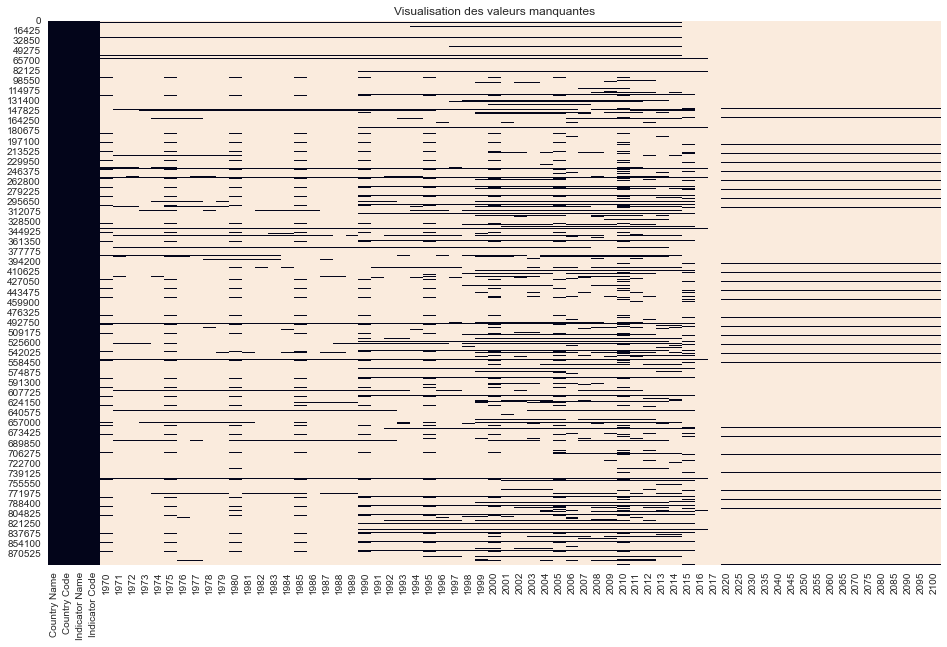

In [339]:
# visialisation par Whitegrid des données manquantes
sns.set_style('whitegrid')
plt.figure(figsize=(16,10)) #Réglage de la taille
plt.title("Visualisation des valeurs manquantes") #titre 
sns.heatmap(df1.isnull(), cbar=False) #Affichage de la carte thermique

Constat: un nombre conséquant de données manquantes 

In [18]:
df1.index.unique()

RangeIndex(start=0, stop=886930, step=1)

In [19]:
# # Doublon avec toutes les colonnes du dataframe
df1[df1.duplicated(keep=False)].shape[0]

0

In [20]:
# Doublons sur les 2 colonnes Country Name  et Indicator Code & Name
df1[df1.duplicated(['Country Name', 'Indicator Name', 'Indicator Code'], keep=False)].shape[0]


0

In [21]:
# remplacement par nan
df1.replace("?", np.nan, inplace=True)
df1.replace(";", np.nan, inplace=True)
df1.replace(".", np.nan, inplace=True)
df1.replace(",", np.nan, inplace=True)

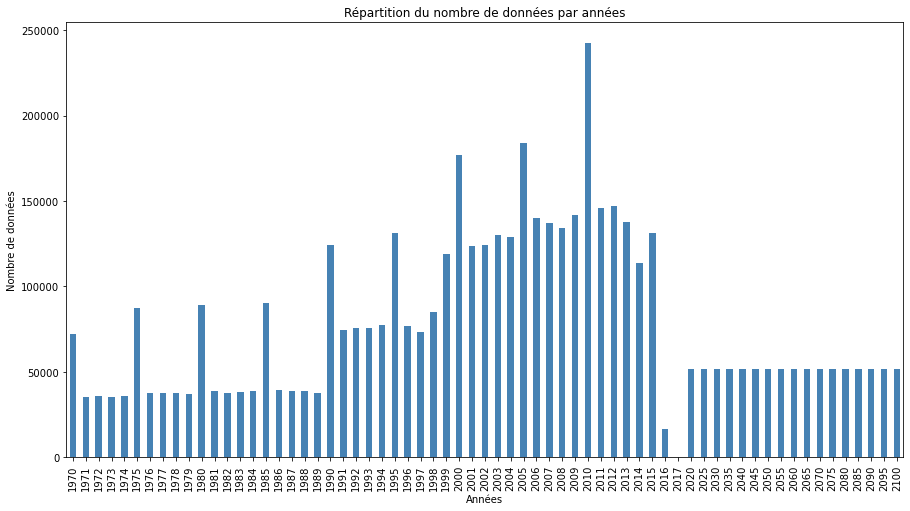

In [22]:
#Répartition de données par années 
plt.figure(figsize=(15, 8))
present = df1.loc[:,'1970':'2100'].notnull().sum()
ax1 = present.plot(kind='bar', color='SteelBlue')
ax1.set_title('Répartition du nombre de données par années')
ax1.set_ylabel('Nombre de données')
ax1.set_xlabel('Années')
ax1.grid(False)

On constate que Très peu de données sont exploitables sur la période 1970-1989 et 2016-2100 .les années les plus interessantes en teme d'exploitation de données se situent ent 1990 et 2015.

On observe un pic de données tous les 5 ans.

Les données sont doublées tous les 10 ans à partir de 1990.

La dernière année exploitable est 2015.

Les années 2020 à 2100 sont des années de prédiction.

l'année 2010 est l'année avec le plus de données significatives 

Les années 2016 et 2017, les plus proches de l'année courante (2021) contiennent moins de 2 % de variables et sont donc inexploitables.

In [23]:
# Je compte plus utiliser le nom des pays plutot que les codes ceci est valable aussi pour les indicateurs== Suprimer
df1.drop(['Country Code'], axis=1, inplace=True)

In [24]:
df1.drop(['Indicator Code'], axis=1, inplace=True)

###  Selection des indicateurs sur la base de niveau d étude, l age et la proportion à la population. La cible est une population entre 15 et 25 ans 

In [25]:
#Reduction du DataFrame pour déterminer les indicateurs (référence année 2010, au moins à 30% de la ref=2010)
list_columns = list(df1.columns)
nb_Null = 0
reduction_seuil = df1['2010'].notna().sum() *0.3
print(reduction_seuil)
for col in  list_columns:
    if (df1[col].notna().sum() < reduction_seuil) :
        df1.drop(labels=[col], axis=1,inplace = True)
        print('colonne supprime :', col)
        print('---')
        nb_Null+=1
if nb_Null == 0 :
    print('Pas de colonne a supprimer')

72732.59999999999
colonne supprime : 1970
---
colonne supprime : 1971
---
colonne supprime : 1972
---
colonne supprime : 1973
---
colonne supprime : 1974
---
colonne supprime : 1976
---
colonne supprime : 1977
---
colonne supprime : 1978
---
colonne supprime : 1979
---
colonne supprime : 1981
---
colonne supprime : 1982
---
colonne supprime : 1983
---
colonne supprime : 1984
---
colonne supprime : 1986
---
colonne supprime : 1987
---
colonne supprime : 1988
---
colonne supprime : 1989
---
colonne supprime : 2016
---
colonne supprime : 2017
---
colonne supprime : 2020
---
colonne supprime : 2025
---
colonne supprime : 2030
---
colonne supprime : 2035
---
colonne supprime : 2040
---
colonne supprime : 2045
---
colonne supprime : 2050
---
colonne supprime : 2055
---
colonne supprime : 2060
---
colonne supprime : 2065
---
colonne supprime : 2070
---
colonne supprime : 2075
---
colonne supprime : 2080
---
colonne supprime : 2085
---
colonne supprime : 2090
---
colonne supprime : 2095
---
co

D'une maniere générale la variale année est située entre 1990-2015

In [26]:
pd.set_option('max_colwidth', None)
liste_mot_cle_sec1=[row for row in df1['Indicator Name'] if ('both sexes') in row ]
df1[df1['Indicator Name'].isin(liste_mot_cle_sec1)][['Indicator Name']];
liste_mot_cle_sec1


['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adult illiterate population, 15+ years, both sexes (number)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, both sexes (number)',
 'Africa Dataset: Graduates from accredited pre-service primary or secondary teacher training programmes, both sexes (number)',
 'Africa Dataset: Graduates from accredited pre-service primary teacher training programmes, both sexes (number)',
 'Africa Dataset: Graduates from accredited pre-service teacher training programmes, level unspecified, both sexes (number)',
 'Africa Dataset: Graduates from accredited pre-service upper secondary teacher training programmes, both sexes (numbe

In [27]:
pd.set_option('max_colwidth', None)
liste_mot_cle_sec=[row for row in df1['Indicator Name'] if ('Population in thousands, age') in row ]
df1[df1['Indicator Name'].isin(liste_mot_cle_sec)][['Indicator Name']];
liste_mot_cle_sec

['Barro-Lee: Population in thousands, age 15+, female',
 'Barro-Lee: Population in thousands, age 15+, total',
 'Barro-Lee: Population in thousands, age 15-19, female',
 'Barro-Lee: Population in thousands, age 15-19, total',
 'Barro-Lee: Population in thousands, age 20-24, female',
 'Barro-Lee: Population in thousands, age 20-24, total',
 'Barro-Lee: Population in thousands, age 25+, female',
 'Barro-Lee: Population in thousands, age 25+, total',
 'Barro-Lee: Population in thousands, age 25-29, female',
 'Barro-Lee: Population in thousands, age 25-29, total',
 'Barro-Lee: Population in thousands, age 30-34, female',
 'Barro-Lee: Population in thousands, age 30-34, total',
 'Barro-Lee: Population in thousands, age 35-39, female',
 'Barro-Lee: Population in thousands, age 35-39, total',
 'Barro-Lee: Population in thousands, age 40-44, female',
 'Barro-Lee: Population in thousands, age 40-44, total',
 'Barro-Lee: Population in thousands, age 45-49, female',
 'Barro-Lee: Population in tho

In [28]:
indicateurs_pertinent=['Adult literacy rate, population 15+ years, both sexes (%)', 'Adjusted net enrolment rate, upper secondary, both sexes (%)',  'Barro-Lee: Population in thousands, age 15-19, total', 'Barro-Lee: Population in thousands, age 20-24, total', 'Net enrolment rate, secondary, both sexes (%)','Gross enrolment ratio, tertiary, both sexes (%)']
indicateurs_pertinent

['Adult literacy rate, population 15+ years, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Barro-Lee: Population in thousands, age 15-19, total',
 'Barro-Lee: Population in thousands, age 20-24, total',
 'Net enrolment rate, secondary, both sexes (%)',
 'Gross enrolment ratio, tertiary, both sexes (%)']

In [194]:
# Réduire le nombres des lignes sur la bases des indicateurs pertinents
df1=df1[df1['Indicator Name'].isin(indicateurs_pertinent)]
print(f'Nombre de lignes restantes : {df1.shape[0]}')

Nombre de lignes restantes : 1452


In [195]:
years = list(map(str, range(1990, 2016)))
print(f'data dimensions:', df1.shape)

data dimensions: (1452, 31)


In [196]:
#dataframe comptant la plage temporelle 1990-2016
df1_num = df1[years]
df1_num.head(2)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,54.593472,54.593472,54.593472,54.593472,54.593472,66.006065,66.006065,66.006065,66.006065,66.006065,...,77.364586,77.364586,77.364586,77.364586,77.364586,77.364586,77.364586,77.364586,77.364586,NaN


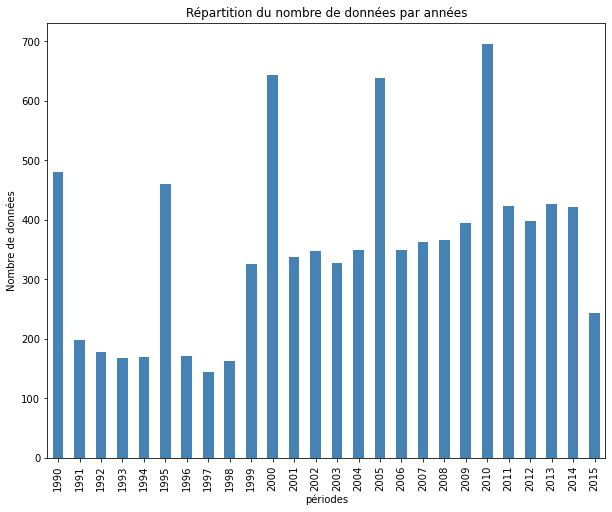

In [197]:
# répartition de nbr de données pour déceler l'année de référence
plt.figure(figsize=(10, 8))
df1_data = df1.loc[:,'1990':'2015'].notnull().sum()
ax1 = df1_data.plot(kind='bar', color='SteelBlue')
ax1.set_title('Répartition du nombre de données par années')
ax1.set_xlabel('périodes')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)

In [198]:
# Variables qualitatives
df1_objet_categ = df1.loc[:, ['Country Name', 'Indicator Name']]

# La méthode fillna transforme tous les types en object
df1_num.fillna(method='ffill', axis=1, inplace=True)  

#concaténation des deux dataframes
df1_concat = pd.concat([df1_objet_categ,df1_num], axis=1) 

nombre_de_pays=df1_concat['Country Name'].nunique()
print(f'Nombre de pays : {nombre_de_pays}')



Nombre de pays : 242


C:\Users\LECLERC\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [199]:
#par souci de cohérence, on change les titres en string
df1_concat.columns = list(map(str, df1_concat.columns))
df1_concat.head(2)

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
8,Arab World,"Adjusted net enrolment rate, upper secondary, both sexes (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Arab World,"Adult literacy rate, population 15+ years, both sexes (%)",54.593472,54.593472,54.593472,54.593472,54.593472,66.006065,66.006065,66.006065,...,77.364586,77.364586,77.364586,77.364586,77.364586,77.364586,77.364586,77.364586,77.364586,77.364586


In [200]:
# On ne conserve que l'année la plus remplie
df1_2010=df1_concat[['Country Name','Indicator Name','2010']]

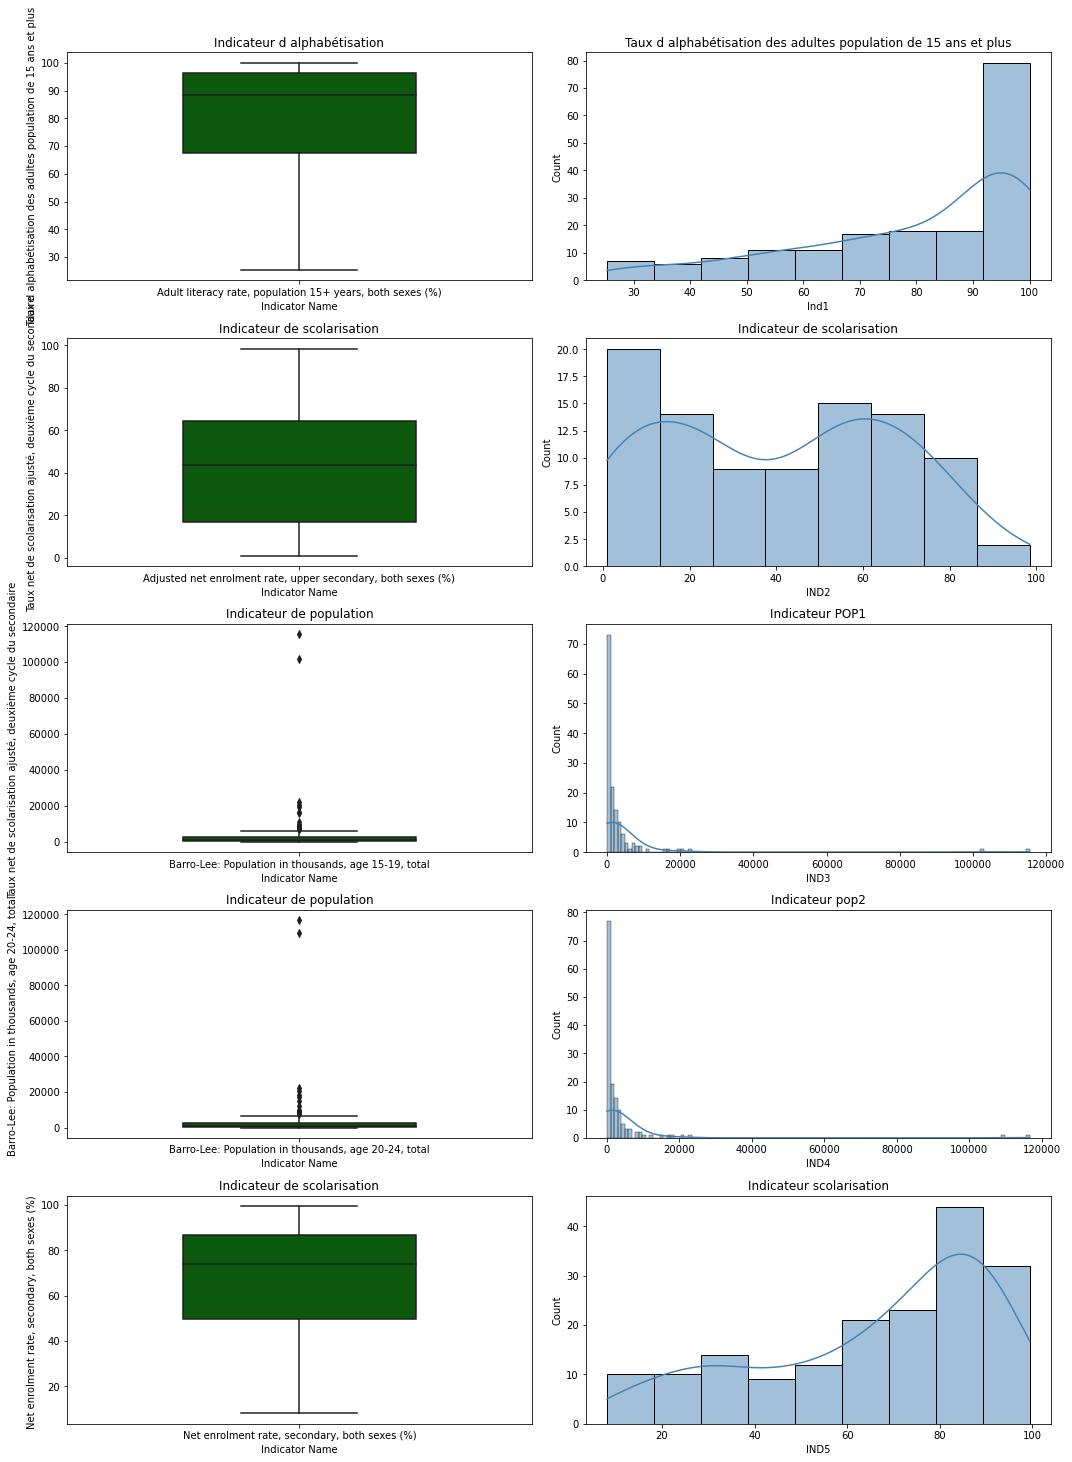

In [201]:
plt.figure(figsize = (15,20)) 

plt.subplot(5,2,1)
df_ind1=df1_concat[df1_concat['Indicator Name'] == 'Adult literacy rate, population 15+ years, both sexes (%)']
sns.boxplot( x=df_ind1['Indicator Name'], y=df_ind1['2010'], width=0.5, color='darkgreen')
#Crée une figure à moustaches à partir des colonnes DataFrame
plt.title('Indicateur d alphabétisation') 
#titre du graphe
plt.ylabel('Taux d alphabétisation des adultes population de 15 ans et plus') 
#titre des ordonnés

plt.subplot(5,2,2) #Créer une figure et un ensemble de sous-parcelles
sns.histplot(df_ind1['2010'], kde = True, color='SteelBlue') #Dessine un histogramme à partir des colonnes du DataFrame
plt.title('Taux d alphabétisation des adultes population de 15 ans et plus')
plt.xlabel('Ind1')
plt.tight_layout()

plt.subplot(5,2,3)
df_ind2=df1_concat[df1_concat['Indicator Name'] == 'Adjusted net enrolment rate, upper secondary, both sexes (%)']
sns.boxplot( x=df_ind2['Indicator Name'], y=df_ind2['2010'], width=0.5, color='darkgreen')
#Crée une figure à moustaches à partir des colonnes DataFrame
plt.title('Indicateur de scolarisation') 
#titre du graphe
plt.ylabel('Taux net de scolarisation ajusté, deuxième cycle du secondaire ') 
#titre des ordonnés

plt.subplot(5,2,4) #Créer une figure et un ensemble de sous-parcelles
sns.histplot(df_ind2['2010'], kde = True, color='SteelBlue') #Dessine un histogramme à partir des colonnes du DataFrame
plt.title('Indicateur de scolarisation')
plt.xlabel('IND2')
plt.tight_layout()


plt.subplot(5,2,5)
df_ind3=df1_concat[df1_concat['Indicator Name'] == 'Barro-Lee: Population in thousands, age 15-19, total']
sns.boxplot( x=df_ind3['Indicator Name'], y=df_ind3['2010'], width=0.5, color='darkgreen')
#Crée une figure à moustaches à partir des colonnes DataFrame
plt.title('Indicateur de population') 
#titre du graphe
plt.ylabel('Taux net de scolarisation ajusté, deuxième cycle du secondaire ') 
#titre des ordonnés

plt.subplot(5,2,6) #Créer une figure et un ensemble de sous-parcelles
sns.histplot(df_ind3['2010'], kde = True, color='SteelBlue') #Dessine un histogramme à partir des colonnes du DataFrame
plt.title('Indicateur POP1')
plt.xlabel('IND3')
plt.tight_layout()

plt.subplot(5,2,7) 
df_ind4=df1_concat[df1_concat['Indicator Name'] == 'Barro-Lee: Population in thousands, age 20-24, total']
sns.boxplot( x=df_ind4['Indicator Name'], y=df_ind4['2010'], width=0.5, color='darkgreen')
#Crée une figure à moustaches à partir des colonnes DataFrame
plt.title('Indicateur de population') 
#titre du graphe
plt.ylabel('Barro-Lee: Population in thousands, age 20-24, total ') 
#titre des ordonnés

plt.subplot(5,2,8) #Créer une figure et un ensemble de sous-parcelles
sns.histplot(df_ind4['2010'], kde = True, color='SteelBlue') #Dessine un histogramme à partir des colonnes du DataFrame
plt.title('Indicateur pop2')
plt.xlabel('IND4')
plt.tight_layout()

plt.subplot(5,2,9) 
df_ind5=df1_concat[df1_concat['Indicator Name'] == 'Net enrolment rate, secondary, both sexes (%)']
sns.boxplot( x=df_ind5['Indicator Name'], y=df_ind5['2010'], width=0.5, color='darkgreen')
#Crée une figure à moustaches à partir des colonnes DataFrame
plt.title('Indicateur de scolarisation') 
#titre du graphe
plt.ylabel('Net enrolment rate, secondary, both sexes (%) ') 
#titre des ordonnés

plt.subplot(5,2,10) #Créer une figure et un ensemble de sous-parcelles
sns.histplot(df_ind5['2010'], kde = True, color='SteelBlue') #Dessine un histogramme à partir des colonnes du DataFrame
plt.title('Indicateur scolarisation')
plt.xlabel('IND5')
plt.tight_layout()



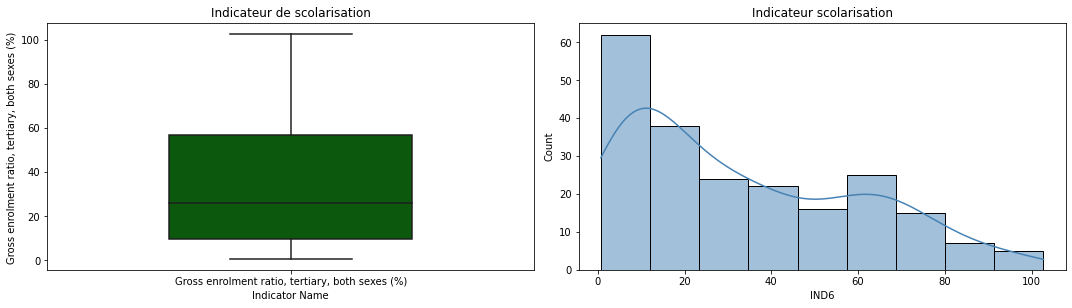

In [202]:
plt.figure(figsize = (15,20)) 
plt.subplot(5,2,1)  
df_ind6=df1_concat[df1_concat['Indicator Name'] == 'Gross enrolment ratio, tertiary, both sexes (%)']
sns.boxplot( x=df_ind6['Indicator Name'], y=df_ind6['2010'], width=0.5, color='darkgreen')
#Crée une figure à moustaches à partir des colonnes DataFrame
plt.title('Indicateur de scolarisation') 
#titre du graphe
plt.ylabel('Gross enrolment ratio, tertiary, both sexes (%) ') 
#titre des ordonnés

plt.subplot(5,2,2) #Créer une figure et un ensemble de sous-parcelles
sns.histplot(df_ind6['2010'], kde = True, color='SteelBlue') #Dessine un histogramme à partir des colonnes du DataFrame
plt.title('Indicateur scolarisation')
plt.xlabel('IND6')
plt.tight_layout()

Notes :

L'indicateur 2 presente une forme bimodale avec 2 pics qui indique qu'il y a deux groupes différents(à 20% et à 60%).
Taux net de scolarisation ajusté, deuxième cycle du secondaire est plus ou moins reparti entre les pays que Taux d'alphabétisation des adultes. Tandis que la repartition du Taux net de scolarisation, secondaire et
Taux brut de scolarisation superieur sont à l'opposé.
les données de l Ind3 et Ind4 ne sont pas exploitables
Présence d'aucuns outlier 

In [203]:
#Statistique descriptive

mean_ind1=df_ind1['2010'].mean()
mean_ind2=df_ind2['2010'].mean()
mean_ind5=df_ind5['2010'].mean()
mean_ind6=df_ind6['2010'].mean()

median_ind1=df_ind1['2010'].median()
median_ind2=df_ind2['2010'].median()
median_ind5=df_ind5['2010'].median()
median_ind6=df_ind6['2010'].median()

var_ind1=df_ind1['2010'].var(ddof=0)
var_ind2=df_ind2['2010'].var(ddof=0)
var_ind5=df_ind5['2010'].var(ddof=0)
var_ind6=df_ind6['2010'].var(ddof=0)

std_ind1=df_ind1['2010'].std(ddof=0)
std_ind2=df_ind2['2010'].std(ddof=0)
std_ind5=df_ind5['2010'].std(ddof=0)
std_ind6=df_ind6['2010'].std(ddof=0)

skew_ind1=df_ind1['2010'].skew()
skew_ind2=df_ind2['2010'].skew()
skew_ind5=df_ind5['2010'].skew()
skew_ind6=df_ind6['2010'].skew()

kurtosis_ind1=df_ind1['2010'].kurtosis()
kurtosis_ind2=df_ind2['2010'].kurtosis()
kurtosis_ind5=df_ind5['2010'].kurtosis()
kurtosis_ind6=df_ind6['2010'].kurtosis()



In [204]:
#Définition d'un dataframe contenant les moyennes, les médianes, les variances,l'asymétrie non biaisée,l'aplatissement non biaisé de tous les indicateurs
data_stats = [['mean',mean_ind1, mean_ind2, mean_ind5, mean_ind6],
        ['median', median_ind1, median_ind2, median_ind5, median_ind6],
        ['var',var_ind1, var_ind2,var_ind5, var_ind6], 
        ['std',std_ind1, std_ind2, std_ind5, std_ind6], 
        ['skew', skew_ind1, skew_ind2, skew_ind5, skew_ind6], 
        ['kurtosis', kurtosis_ind1, kurtosis_ind2, kurtosis_ind5, kurtosis_ind6]]
df1_stat = pd.DataFrame(data_stats,columns=['Descriptive','Stat_ind1','Stat_ind2', 'Stat_ind5', 'Stat_ind6'])
df1_stat

,Descriptive,Stat_ind1,Stat_ind2,Stat_ind5,Stat_ind6
0,mean,79.710228,40.768553,66.403454,33.426465
1,median,88.308300,43.719471,74.111870,26.081289
2,var,417.168106,733.587823,629.929633,706.861001
3,std,20.424694,27.084826,25.098399,26.586858
4,skew,-1.016207,0.079817,-0.758645,0.652539
5,kurtosis,-0.006910,-1.248905,-0.638534,-0.715376


Pour l Ind2 et Ind6 : les courbres sont étalées à droite car le skewness est positif,elles sont aplaties que la distribution normale car le kurtosis empirique est positif et leur variance est élevée.
Pour L ind 1 et Ind5 : les courbes sont étalées à gauche et légerement aplaties car le skweness et le Kurtosis sont négatif

In [205]:
# J'estime garder 3 indicateurs qui correspondent aux niveaux scolaires entre 15-24 ans
selection_ind_pertinent=['Adjusted net enrolment rate, upper secondary, both sexes (%)','Net enrolment rate, secondary, both sexes (%)','Gross enrolment ratio, tertiary, both sexes (%)' ]
selection_ind_pertinent

['Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Net enrolment rate, secondary, both sexes (%)',
 'Gross enrolment ratio, tertiary, both sexes (%)']

In [206]:
# Réduire le nombres des lignes sur la bases des indicateurs pertinents
df1_concat=df1_concat[df1_concat['Indicator Name'].isin(selection_ind_pertinent)]
print(f'Nombre de lignes restantes : {df1.shape[0]}')

Nombre de lignes restantes : 1452


In [207]:
# on ne conserve que les 2 indicateurs avec, pour chaque indicateur et pays, la dernière information réelle ou interpolée de 2013
#Crée un tableau croisé dynamique de style feuille de calcul en tant que DataFrame.

df1_stat_selection= df1_concat.pivot_table(index=['Country Name'], columns="Indicator Name")['2010']

df1_stat_selection.shape


(220, 3)

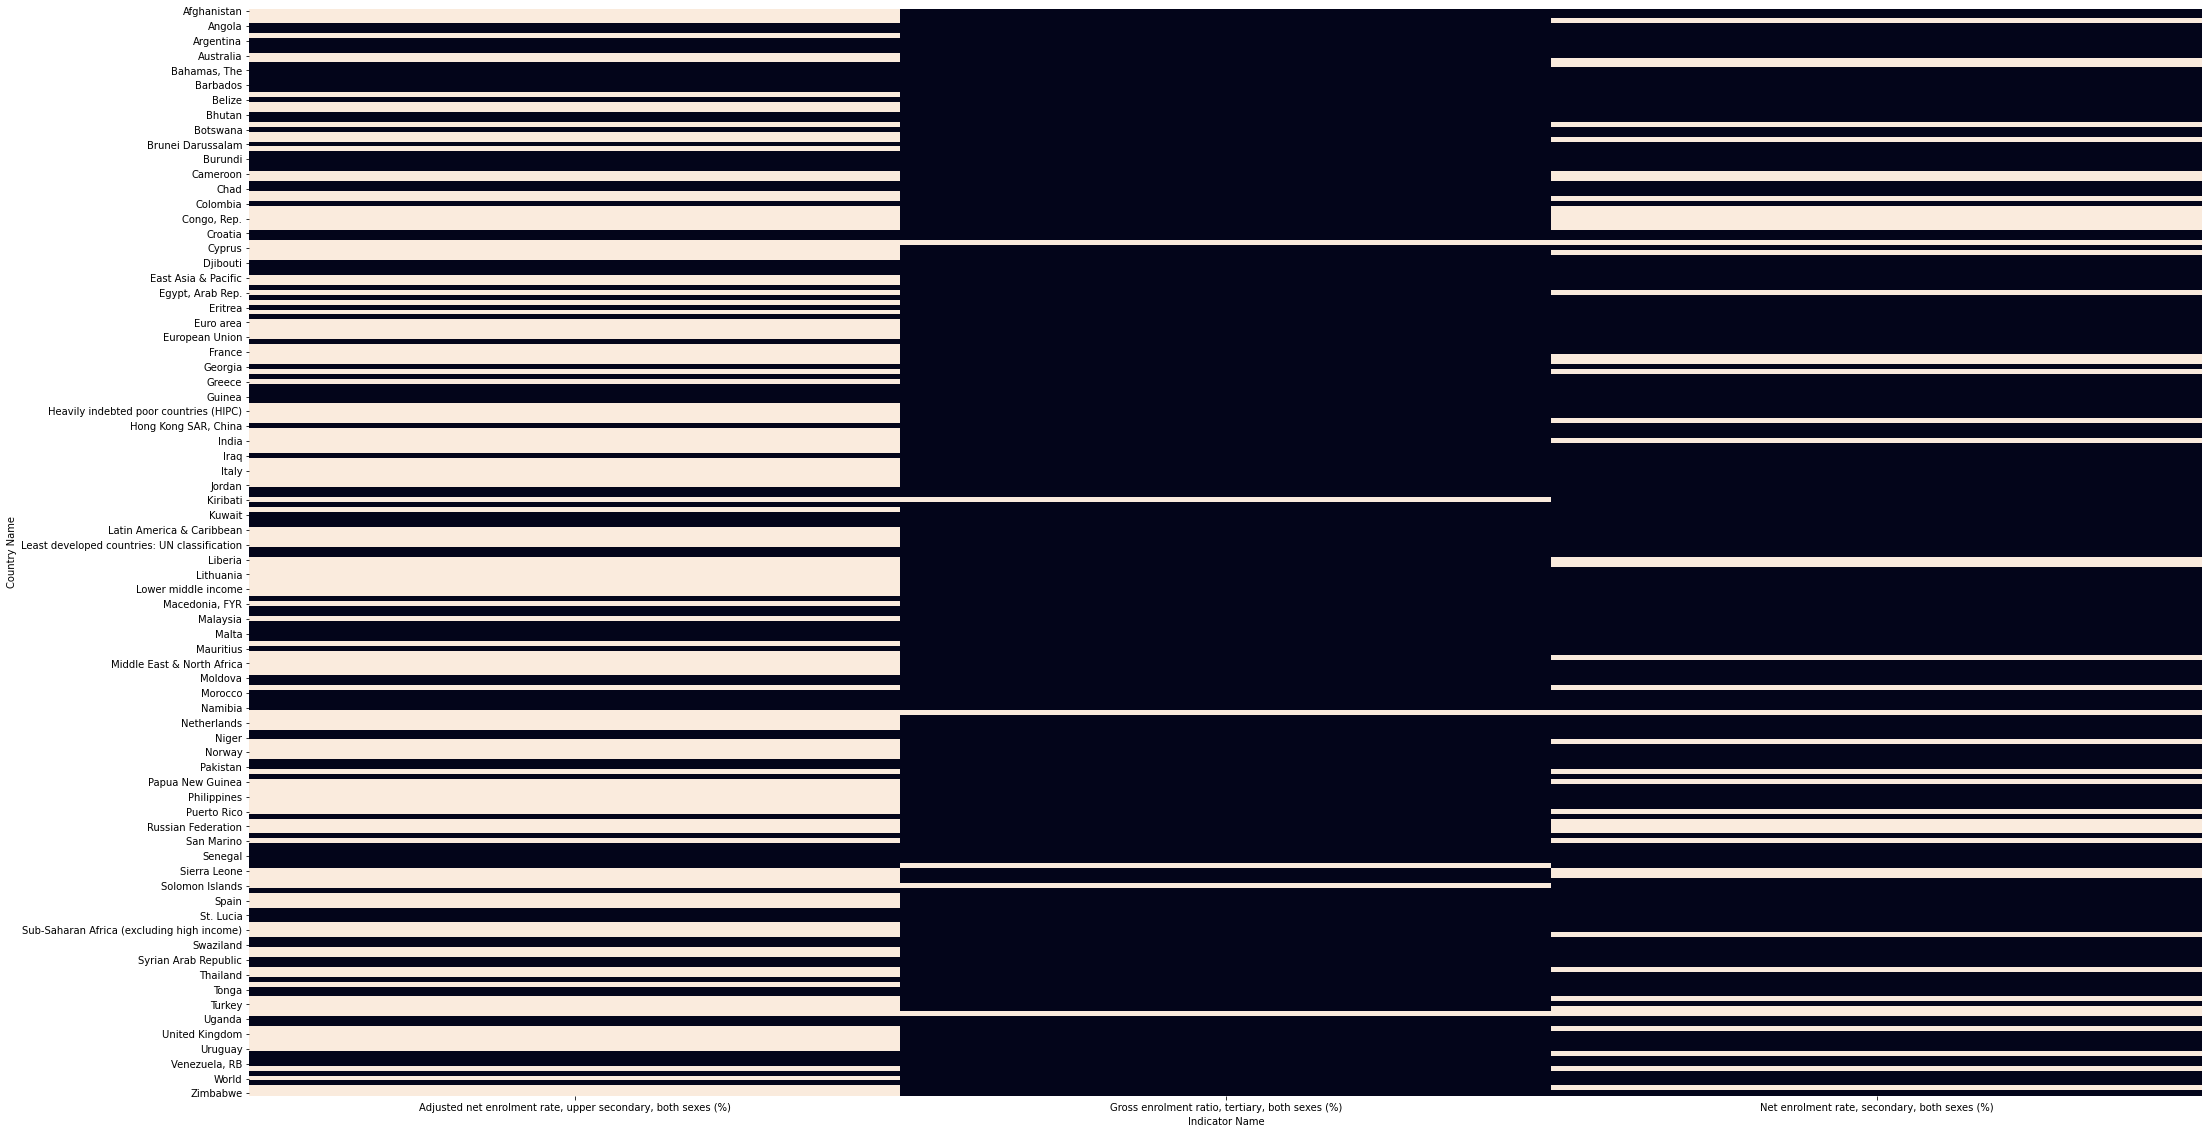

In [91]:
# Affiche un graphe  des données manquantes sur la colonne des indicateurs 
plt.figure(figsize=(35,20)) 
sns.heatmap(df1_stat_selection.isna(), cbar=False)

plt.show()  

In [209]:
# Liste des pays avec au moins un indicateur manquant
s_pays_indic_manquant=df1_stat_selection.notnull().sum(axis=1)
i_pays_indic_manquant=s_pays_indic_manquant[s_pays_indic_manquant<2].index
print(f'Nombre de pays à retirer : {len(i_pays_indic_manquant)}')
df1_retrait=df1_stat_selection.loc[i_pays_indic_manquant, :].sort_values(by='Gross enrolment ratio, tertiary, both sexes (%)', ascending=False)
df1_retrait

Nombre de pays à retirer : 45


Indicator Name,"Adjusted net enrolment rate, upper secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Net enrolment rate, secondary, both sexes (%)"
Country Name,,,
Puerto Rico,NaN,86.353920,NaN
Russian Federation,NaN,75.432938,NaN
Austria,NaN,68.732178,NaN
Romania,NaN,67.808311,NaN
San Marino,NaN,64.844292,NaN
Czech Republic,NaN,64.018982,NaN
British Virgin Islands,NaN,62.487099,NaN
Libya,NaN,61.137131,NaN
Canada,NaN,58.883591,NaN


In [210]:
# On ne conserve que les pays avec les 2 indicateurs renseignés
df1_stat_selection.dropna(thresh = 2, inplace=True)  # supprime les lignes contenant des valeurs manquantes
print(f'Nombre de pays restant : {df1_stat_selection.shape[0]}')

Nombre de pays restant : 175


In [211]:
scaler_pow = PowerTransformer(method = 'box-cox') #Applique une transformation de puissance ne fonctionne qu'avec des valeurs strictement positives
df1_score_scaled= scaler_pow.fit_transform(df1_stat_selection[selection_ind_pertinent]) # la méthode fit_transform ajuste aux données, puis les transformer
df1_score_scaled = pd.DataFrame(df1_score_scaled, columns=selection_ind_pertinent)
df1_score_scaled['Country Name'] = df1_stat_selection.index
df1_score_scaled['Score']= [(row[0] *3 + row[1] * 2 + row[2] *1) for row in zip(df1_score_scaled['Adjusted net enrolment rate, upper secondary, both sexes (%)'], df1_score_scaled['Gross enrolment ratio, tertiary, both sexes (%)'], df1_score_scaled ['Net enrolment rate, secondary, both sexes (%)'])]
df1_score_scaled.sort_values(by='Score',ascending=False).head(10)

,"Adjusted net enrolment rate, upper secondary, both sexes (%)","Net enrolment rate, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Country Name,Score
14,1.426944,1.215409,1.391162,Belarus,8.278564
34,1.284107,0.895360,1.701731,Cuba,8.151142
77,1.610252,1.105437,0.641821,Kazakhstan,7.219836
79,1.723545,1.472616,0.169840,"Korea, Dem. People’s Rep.",6.982932
33,1.270944,1.320736,0.863813,Croatia,6.861195
138,1.384660,1.015085,0.722954,Serbia,6.614975
163,0.905472,0.773737,1.438086,Ukraine,6.366324
6,1.289211,0.958635,0.763356,Armenia,6.352980
13,0.870021,0.754555,1.201873,Barbados,5.768365
65,1.031204,0.485850,0.954421,"Hong Kong SAR, China",5.488304


In [212]:
df1_top_10 =df1_score_scaled.sort_values(['Score'],ascending=False, axis=0).head(10)
df1_top_10

,"Adjusted net enrolment rate, upper secondary, both sexes (%)","Net enrolment rate, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Country Name,Score
14,1.426944,1.215409,1.391162,Belarus,8.278564
34,1.284107,0.895360,1.701731,Cuba,8.151142
77,1.610252,1.105437,0.641821,Kazakhstan,7.219836
79,1.723545,1.472616,0.169840,"Korea, Dem. People’s Rep.",6.982932
33,1.270944,1.320736,0.863813,Croatia,6.861195
138,1.384660,1.015085,0.722954,Serbia,6.614975
163,0.905472,0.773737,1.438086,Ukraine,6.366324
6,1.289211,0.958635,0.763356,Armenia,6.352980
13,0.870021,0.754555,1.201873,Barbados,5.768365
65,1.031204,0.485850,0.954421,"Hong Kong SAR, China",5.488304


In [213]:
df1_top_10.set_index('Country Name', inplace=True)

In [214]:
df1_top_10.head(2)

,"Adjusted net enrolment rate, upper secondary, both sexes (%)","Net enrolment rate, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Score
Country Name,,,,
Belarus,1.426944,1.215409,1.391162,8.278564
Cuba,1.284107,0.895360,1.701731,8.151142


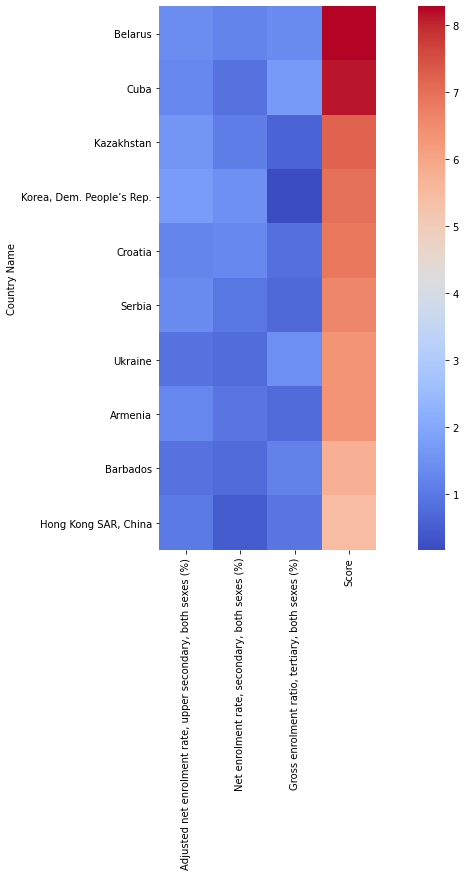

In [215]:
fig = plt.figure(1,figsize=(15, 10))
sns.heatmap(df1_top_10, square=True, cmap='coolwarm', fmt="d", )
plt.show()

# Conclusion
L’analyse exploratoire des données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion. Nous avons enregistré le top 10 des pays à fort potentiels étonnement à l'encontre de mes attentes , ceci est du que cette analyse s'est concentrée que sur un jeu de donnée liés à l'éducation , d'autres facteurs socio-éconmique important peuvent donner un autre top 10. 